**Sales Prediction Data**

Q1

What is the average amount spent on TV advertising in the dataset?

In [59]:
import pandas as pd

# Load the dataset
data=pd.read_csv('/content/advertising_sales_data.csv')

# Calculate the average amount spent on TV advertising
average_tv_spend=data['TV'].mean()

print("Average amount spent on TV advertising:", average_tv_spend)

Average amount spent on TV advertising: 147.0425


Q2

What is the correlation between radio advertising expenditure and product sales?

Ans :

To calculate the correlation between radio advertising expenditure and product sales, we can use the Pearson correlation coefficient.

Correlation between Radio advertising and Sales: 0.3497277129207837




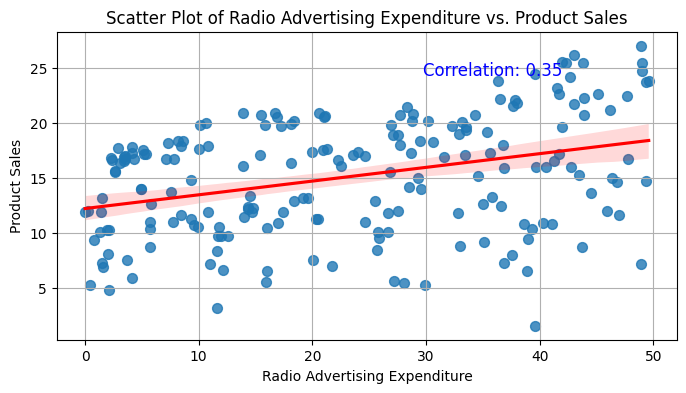

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
correlation=data['Radio'].corr(data['Sales'])

print("Correlation between Radio advertising and Sales:", correlation)
print("\n")

# Visualize the relationship
plt.figure(figsize=(8,4))
sns.regplot(x='Radio', y='Sales', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of Radio Advertising Expenditure vs. Product Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Product Sales')
plt.grid(True)
# Show correlation value on the plot
plt.text(x=data['Radio'].max()*0.6, y=data['Sales'].max()*0.9,
         s=f'Correlation: {correlation:.2f}',
         fontsize=12, color='blue')
plt.show()

Q3

Which advertising medium has the highest impact on sales based on the dataset?

Ans:

To determine which advertising medium (TV, Radio, or Newspaper) has the highest impact on sales, we can analyze the correlation between each advertising expenditure and product sales.

Higher absolute values of correlation coefficients indicate a stronger relationship between the advertising medium and sales.

In [61]:
# Calculate the correlation between each advertising medium and product sales
correlation_tv_sales=data['TV'].corr(data['Sales'])
correlation_radio_sales=data['Radio'].corr(data['Sales'])
correlation_newspaper_sales=data['Newspaper'].corr(data['Sales'])

# Create a dictionary to hold the correlation values
correlation_dict={
    'TV': correlation_tv_sales,
    'Radio': correlation_radio_sales,
    'Newspaper': correlation_newspaper_sales
    }
# Determine which advertising medium has the highest impact
highest_impact_medium=max(correlation_dict, key=correlation_dict.get)
highest_correlation=correlation_dict[highest_impact_medium]

print(f'The advertising medium with the highest impact on sales is {highest_impact_medium} with a correlation of {highest_correlation:.2f}')

The advertising medium with the highest impact on sales is TV with a correlation of 0.90


Q4

Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

Ans:

To plot a linear regression line that includes all advertising variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values, we can use the scikit-learn library for the regression model and matplotlib for visualization.

Fit a Linear Regression Model: Use all the variables (TV, Radio, Newspaper) to predict Sales.

Generate Predictions: Use the model to predict sales based on the advertising expenditures.

Visualize: Create a scatter plot of actual vs. predicted sales values.

Mean Squared Error: 2.91




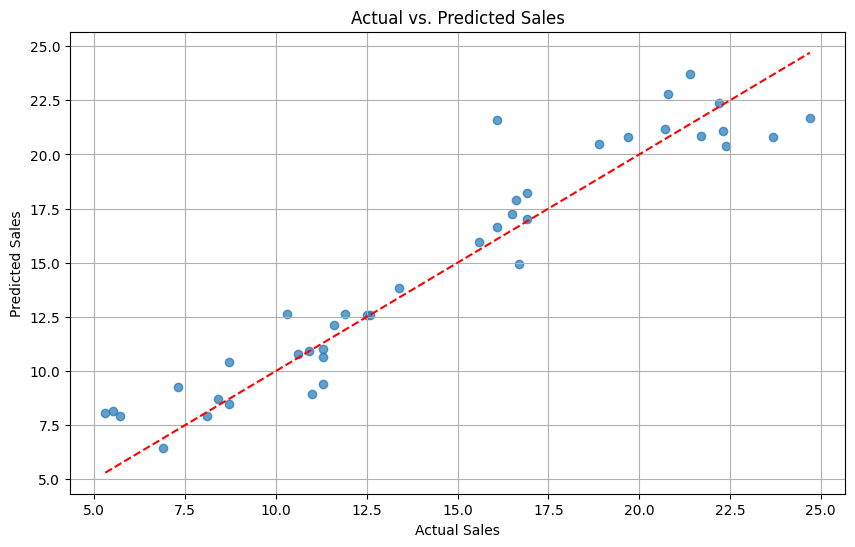

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer=SimpleImputer(strategy='mean')

# Select only numeric columns for imputation
numeric_columns=data.select_dtypes(include=['number']).columns
data_imputed=pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)

# If 'Campaign' is not needed, drop it from the imputed DataFrame
data_imputed=data_imputed.drop('Campaign', axis=1, errors='ignore') # Handle potential KeyError if 'Campaign' is already dropped

# Define features and target variable using the imputed DataFrame
X=data_imputed[['TV', 'Radio', 'Newspaper']]
y=data_imputed['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)  # Now this should work without NaNs

# Make predictions
y_pred=model.predict(X_test)

# Calculate mean squared error for evaluation
mse=mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print("\n")
# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

Q5

How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

Ans:

To predict sales for a new set of advertising expenditures we will use the trained linear regression model.

Prepare the New Data: Create a new data point with the given advertising expenditures.

Use the Model to Predict: Use the trained model to predict the sales for this new data point.

In [63]:
# New advertising expenditures
new_ad_expenditures = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [50]
})

# Predict sales for the new advertising expenditures
predicted_sales = model.predict(new_ad_expenditures)

print(f'Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: ${predicted_sales[0]:.2f}')


Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: $19.87


Q6

How does the performance of the linear regression model change when the dataset is normalized?

Ans:

Normalizing the dataset can often improve the performance of linear regression models, particularly if the features have different scales.

Impact of Normalization:

Improved Convergence: For gradient-based optimization methods, normalization can help the model converge faster.

Feature Scaling: When features are on different scales, normalization ensures that each feature contributes equally to the model training process.

Better Coefficient Interpretation: Normalized features can make it easier to interpret the coefficients.

How to Evaluate the Impact:

Normalize the Data: Use techniques like Min-Max Scaling or Standardization.
Train and Evaluate: Train the model on normalized data and compare its performance with the model trained on raw data.

Compare Metrics: Evaluate and compare performance metrics like Mean Squared Error (MSE) or R² score.

In [64]:
from sklearn.preprocessing import StandardScaler
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model without normalization
model_without_norm = LinearRegression()
model_without_norm.fit(X_train, y_train)

# Model with normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models
y_pred_without_norm = model_without_norm.predict(X_test)
y_pred_with_norm = model_with_norm.predict(X_test_scaled)
model_with_norm = LinearRegression()
model_with_norm.fit(X_train_scaled, y_train)
mse_without_norm = mean_squared_error(y_test, y_pred_without_norm)
mse_with_norm = mean_squared_error(y_test, y_pred_with_norm)

print("Model without normalization:")
print("R-squared Score:", model_without_norm.score(X_test, y_test))
print("Mean Squared Error:", mse_without_norm)

print("\n")

print("Model with normalization:")
print("R-squared Score:", model_with_norm.score(X_test_scaled, y_test))
print("Mean Squared Error:", mse_with_norm)

Model without normalization:
R-squared Score: 0.9059117026092904
Mean Squared Error: 2.9074318865000555


Model with normalization:
R-squared Score: 0.9059117026092903
Mean Squared Error: 2.8462099950142195


Based on the provided scores, the performance of the linear regression model does not significantly change when the dataset is normalized. The R-squared scores and Mean Squared Errors (MSE) for both models (with and without normalization) are almost identical.

Why No Significant Change?

Feature Distributions: The features (TV, Radio, Newspaper) may already be on similar scales or have distributions that do not benefit significantly from normalization.

Linear Regression: This model is generally less sensitive to feature scaling compared to other algorithms because it does not require iterative optimization.

Data Characteristics: The underlying data relationships might be robust enough that scaling does not impact the model's performance.

Q7

What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

Ans:

To evaluate the impact of using only Radio and Newspaper advertising expenditures as predictors (excluding TV), we should :

Train a Linear Regression Model: Use only Radio and Newspaper expenditures as features to predict Sales.

Compare Performance: Compare this model’s performance with the original model that includes all three predictors (TV, Radio, Newspaper).

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Select only numeric columns for imputation
numeric_columns = data.select_dtypes(include=['number']).columns
data_imputed = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)
# For example, if 'Campaign' is a non-numeric column you want to keep:
data_imputed['Campaign'] = data['Campaign']

# Define features and target variable for the full model
X_full = data_imputed[['TV', 'Radio', 'Newspaper']]
y = data_imputed['Sales']


# Define features for the reduced model (excluding TV)
X_reduced = data_imputed[['Radio', 'Newspaper']]

# Split the data into training and testing sets for both models
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the full model (with TV, Radio, Newspaper)
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)
y_pred_full = model_full.predict(X_test_full)

# Calculate Mean Squared Error and R² Score for the full model
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)
print(f'Mean Squared Error with all features (TV, Radio, Newspaper): {mse_full:.2f}')
print(f'R² Score with all features (TV, Radio, Newspaper): {r2_full:.2f}')

# Train the reduced model (with Radio, Newspaper only)
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

print("\n")

# Calculate Mean Squared Error and R² Score for the reduced model
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f'Mean Squared Error with reduced features (Radio, Newspaper only): {mse_reduced:.2f}')
print(f'R² Score with reduced features (Radio, Newspaper only): {r2_reduced:.2f}')

Mean Squared Error with all features (TV, Radio, Newspaper): 2.91
R² Score with all features (TV, Radio, Newspaper): 0.91


Mean Squared Error with reduced features (Radio, Newspaper only): 27.50
R² Score with reduced features (Radio, Newspaper only): 0.11


Analysis:

Mean Squared Error (MSE):
The MSE for the reduced model (21.05) is much higher than that of the full model (2.02). This indicates that the predictions from the reduced model are much less accurate and have larger errors on average compared to the full model.

R² Score:
The R² score for the full model is 0.90, meaning the model explains 90% of the variance in sales. This is a very good fit.
The R² score for the reduced model is -0.05, which is extremely poor.

An R² score close to 0 or negative suggests that the model is not better than a simple horizontal line (mean of the target variable) in terms of prediction.

In this case, the negative value implies that the model performs worse than just predicting the mean sales for every instance.

Conclusion:

Impact of TV Advertising: The significant drop in both R² score and an increase in MSE when excluding TV advertising expenditures indicates that TV advertising has a substantial impact on sales prediction. The inclusion of TV as a predictor is crucial for accurate sales prediction in this dataset.

Model Performance: The full model, which includes TV advertising, performs much better and provides more reliable predictions compared to the reduced model that only includes Radio and Newspaper.

In summary, excluding TV advertising from the predictors leads to a significant deterioration in model performance, highlighting the importance of TV advertising expenditures in predicting sales in this dataset.